<a href="https://colab.research.google.com/github/ArjunRameshV/image_processing_for_auv/blob/master/Understanding_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline 

In [0]:
def display_g(img):
  plt.imshow(img,cmap='gray')
def display(img):
  plt.imshow(img)
def edge_det(img):
  edges = cv2.Canny(dst,100,200)
  display_g(edges)
def show_many(images):
  plt.figure(figsize=(60,40))
  columns = 3
  for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap='gray')

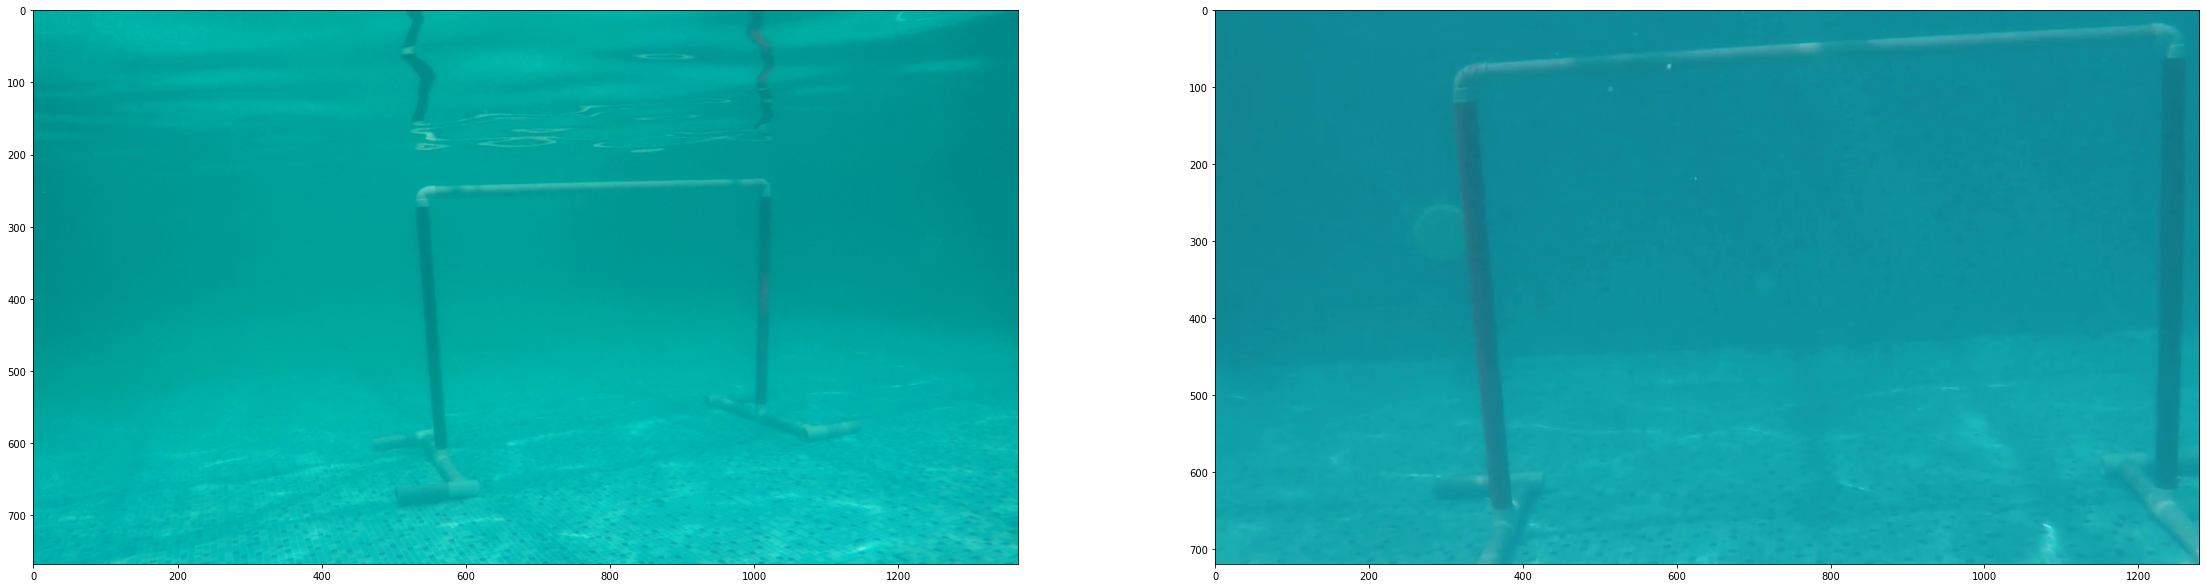

In [7]:
ori_img_1 = cv2.imread("gate2.png")
ori_img_2 = cv2.imread("gate1.jpeg")
img_p = cv2.cvtColor(ori_img_1,cv2.COLOR_BGR2RGB)
img_j = cv2.cvtColor(ori_img_2,cv2.COLOR_BGR2RGB)
show_many([img_p,img_j])

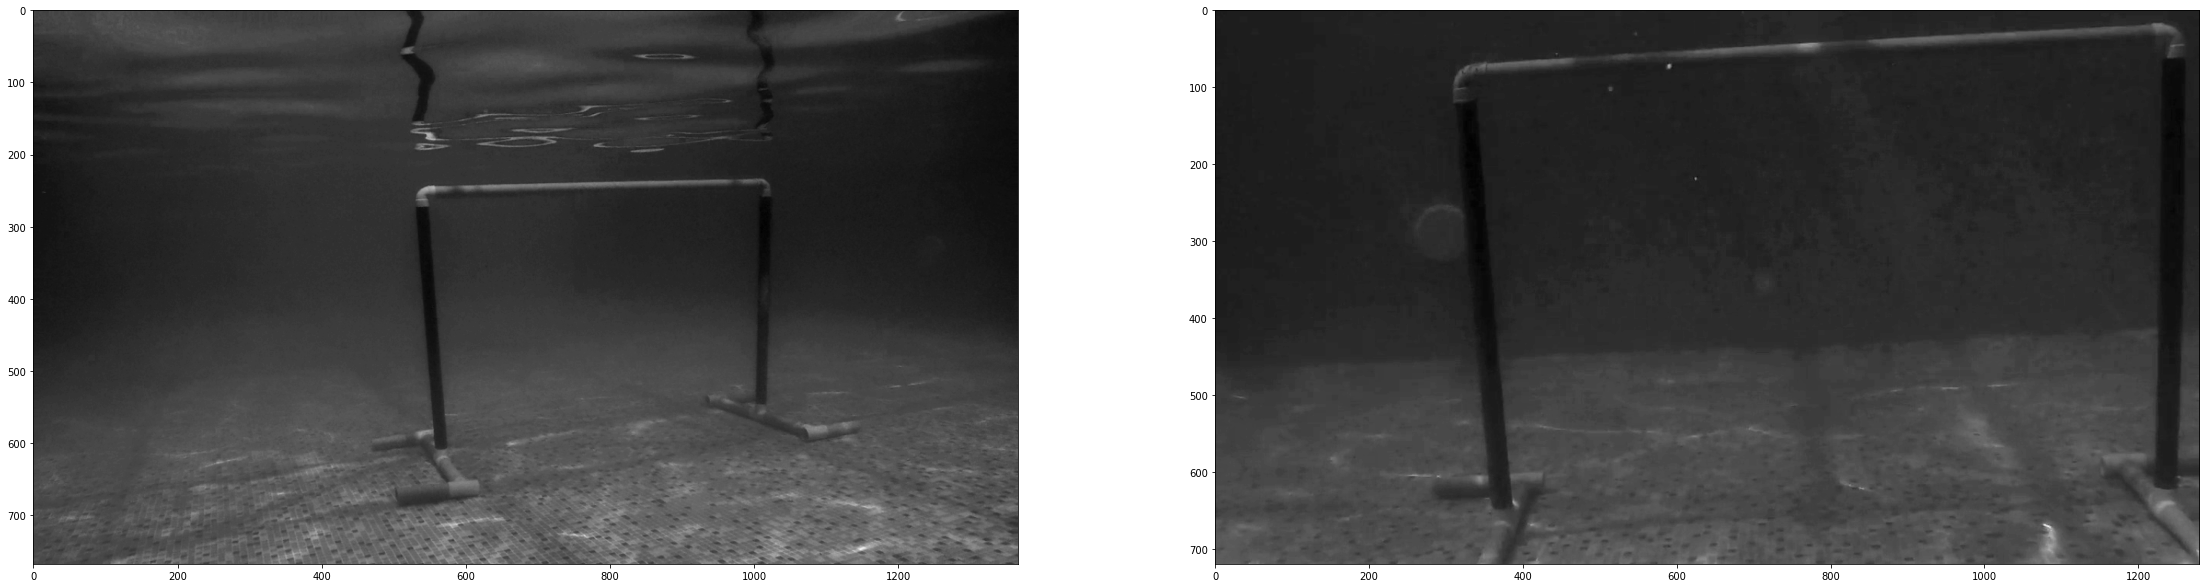

In [10]:
pgray = cv2.cvtColor(img_p,cv2.COLOR_RGB2GRAY)
jgray = cv2.cvtColor(img_j,cv2.COLOR_RGB2GRAY)
show_many([pgray,jgray])

checking out the x-gradient for various kernel values


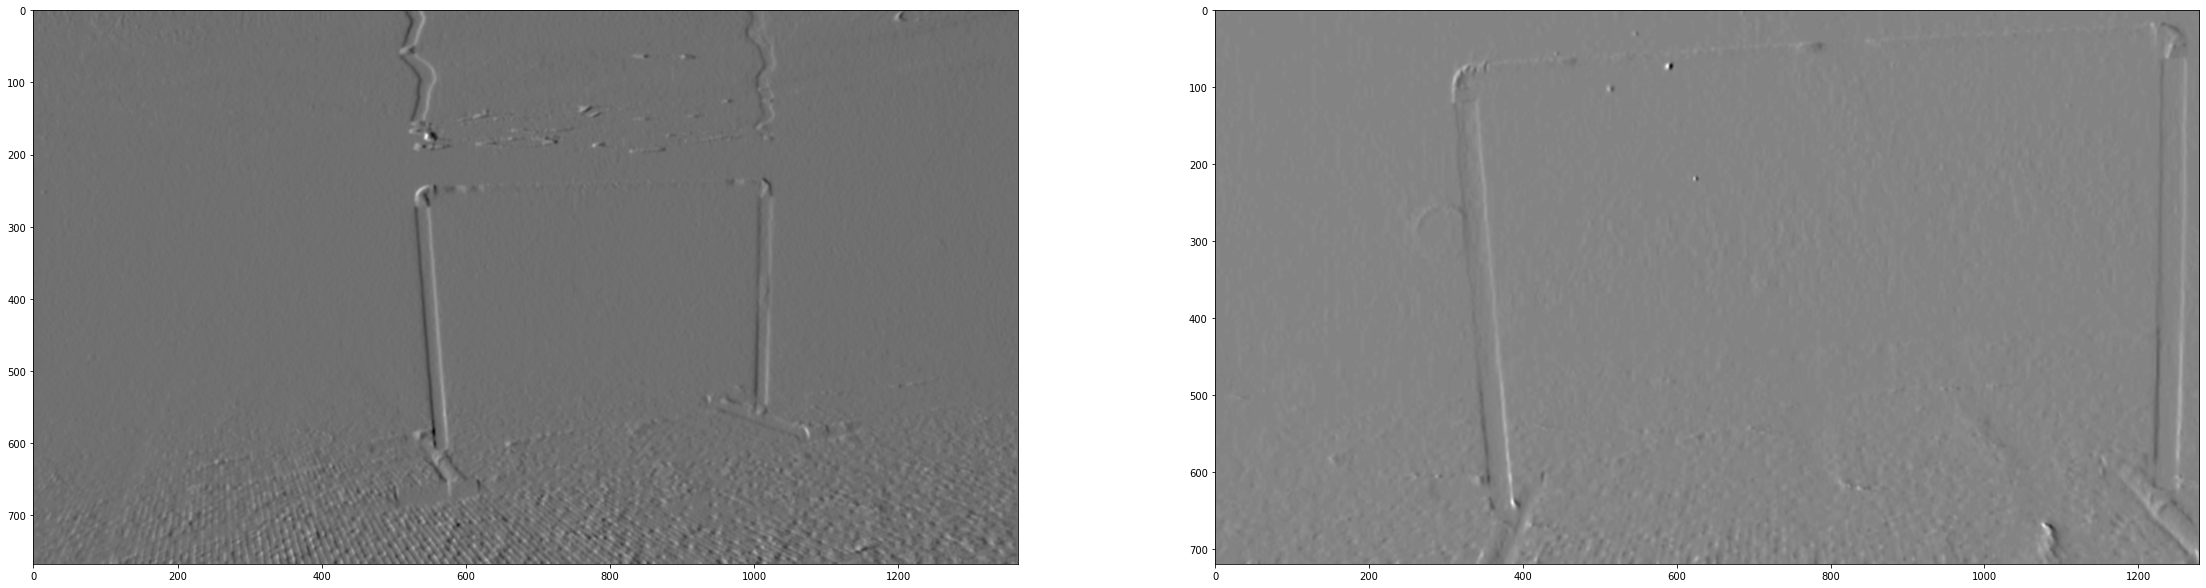

In [55]:
ddepth = [cv2.CV_64F,cv2.CV_32F,-1] 

sobelx_p = cv2.Sobel(pgray,ddepth[0],1,0,ksize=11)
sobelx_j = cv2.Sobel(jgray,ddepth[0],1,0,ksize=11)
show_many([sobelx_p,sobelx_j])

the gradient for the y direction 

(issue noticed is the floor and the ceil)

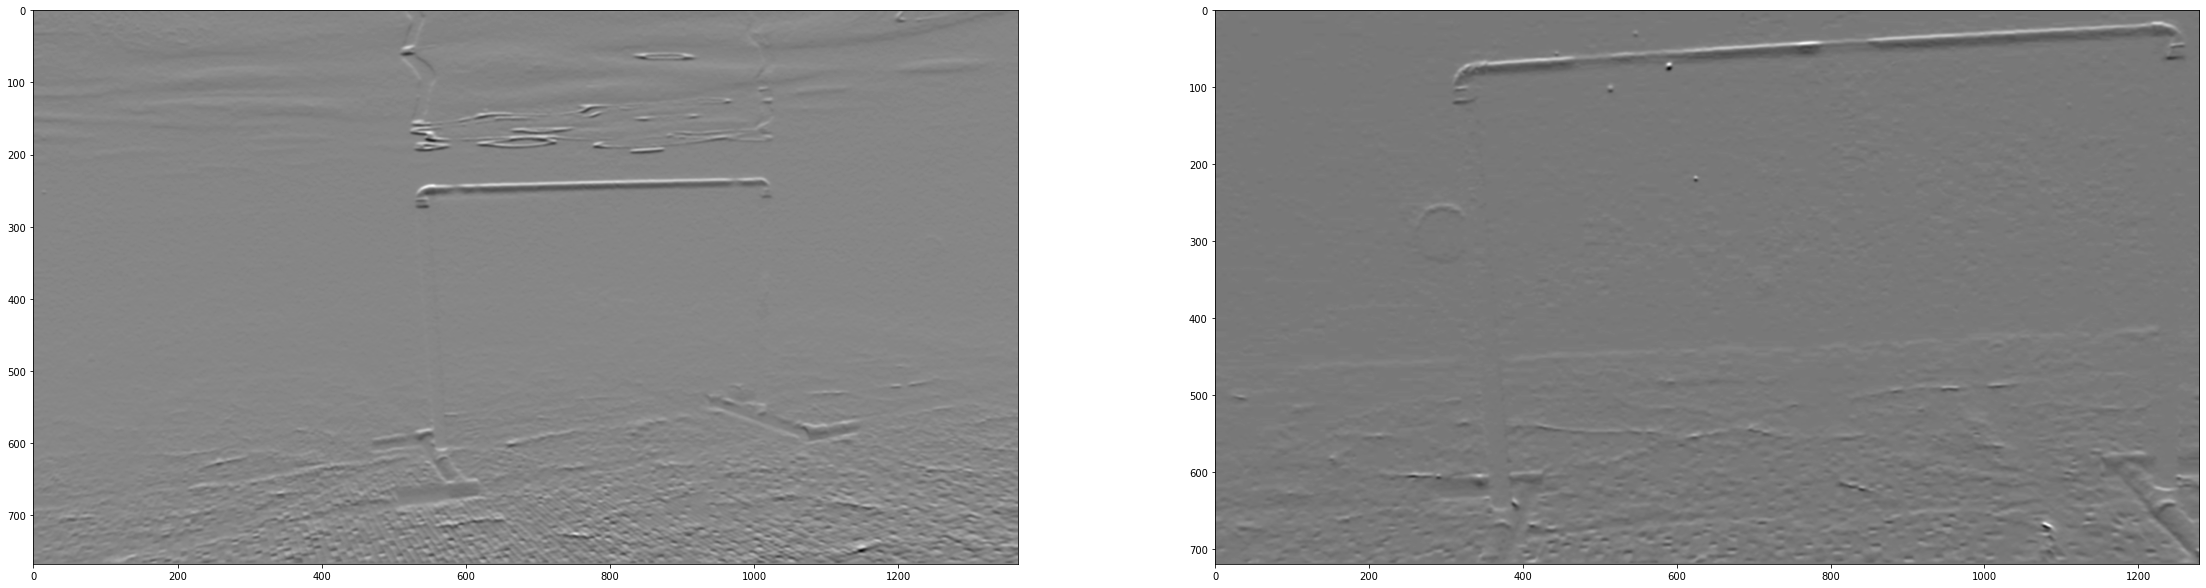

In [42]:
sobely_p = cv2.Sobel(pgray,cv2.ddepth[0],0,1,ksize=11)
sobely_j = cv2.Sobel(jgray,ddepth[0],0,1,ksize=11)
show_many([sobely_p,sobely_j])

Combining x and y sobel images

(Yeild reasonably good results)


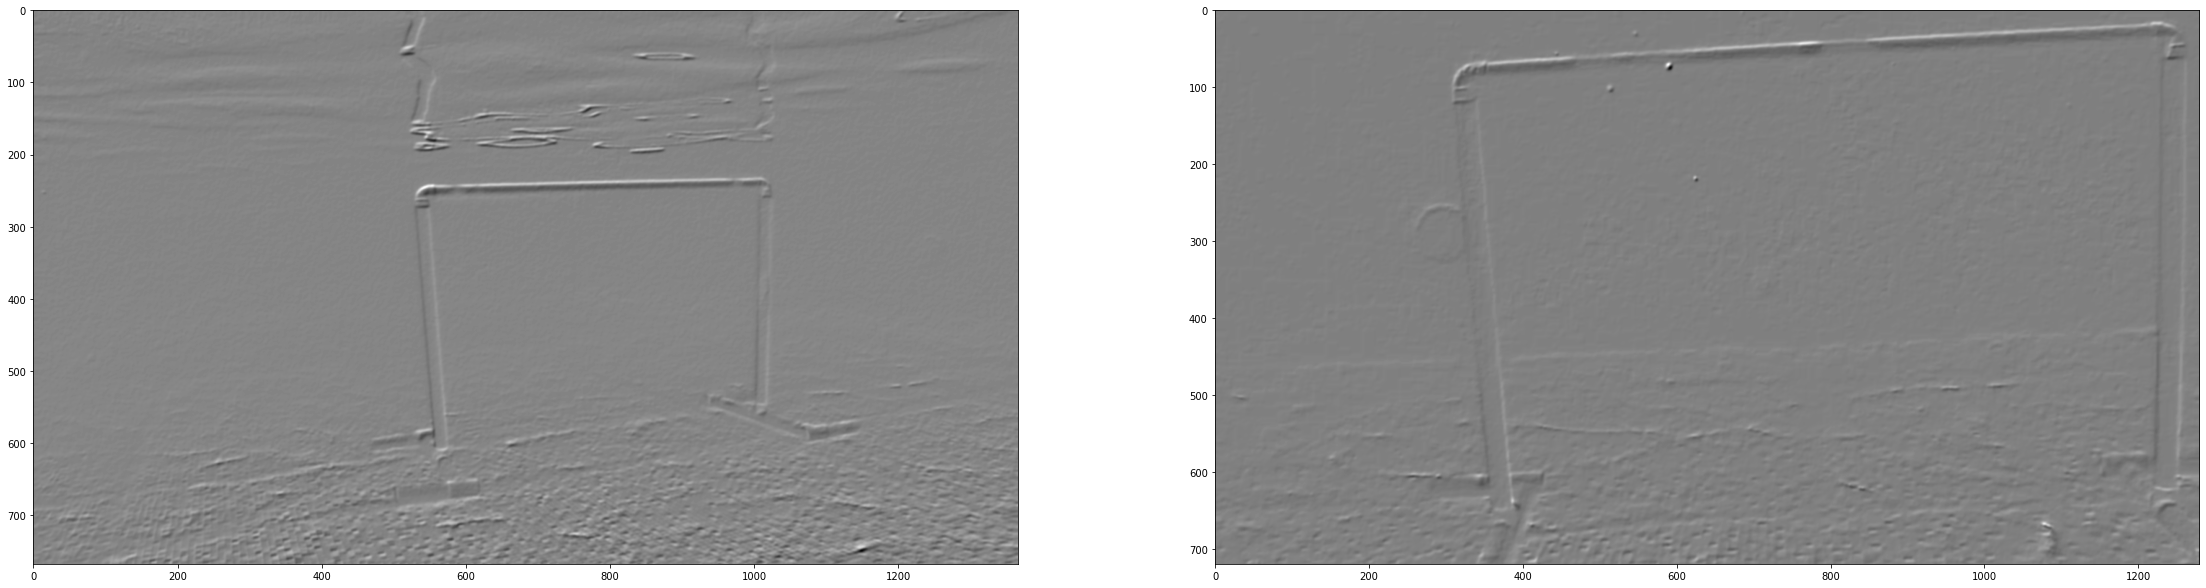

In [50]:
blend_p = cv2.addWeighted(sobelx_p,0.4,sobely_p,0.6,0)
blend_j = cv2.addWeighted(sobelx_j,0.4,sobely_j,0.6,0)
show_many([blend_p,blend_j])

# Applying previous concepts on this blended image

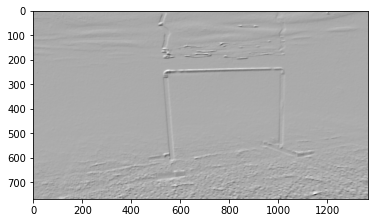

In [61]:
kernel = np.ones((4,4),dtype=np.uint16)
opening = cv2.morphologyEx(blend_p,cv2.MORPH_OPEN,kernel)
display_g(opening)

# Trying out a few custom made operations using convolution

NOT! REALLY A SUCCESS 

In [0]:
def convolve(image, kernel):
  (iH, iW) = image.shape[:2]
  (kH, kW) = kernel.shape[:2]
  pad = (kW - 1) // 2
  image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
  output = np.zeros((iH, iW), dtype="float32")  
  for y in np.arange(pad, iH + pad):
    for x in np.arange(pad, iW + pad):
      roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
      k = (roi * kernel).sum()
      output[y - pad, x - pad] = k
  output = rescale_intensity(output, in_range=(0, 255))
  output = (output * 255).astype("uint8")
	# return the output image
  return output

In [0]:
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

perwitt = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]), dtype="int")

robert_cross = np.array((
    [1, 0],
    [0, -1]), dtype="int")

scharr = np.array((
    [47, 162, 47],
    [0, 0, 0],
    [-47, -162, -47]), dtype="int")

In [0]:
kernels = ( ("sharpen", sharpen),("laplacian", laplacian),("perwitt", perwitt),
	("robert_cross", robert_cross), ("scharr",scharr) )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k
[INFO] applying sharpen kernel


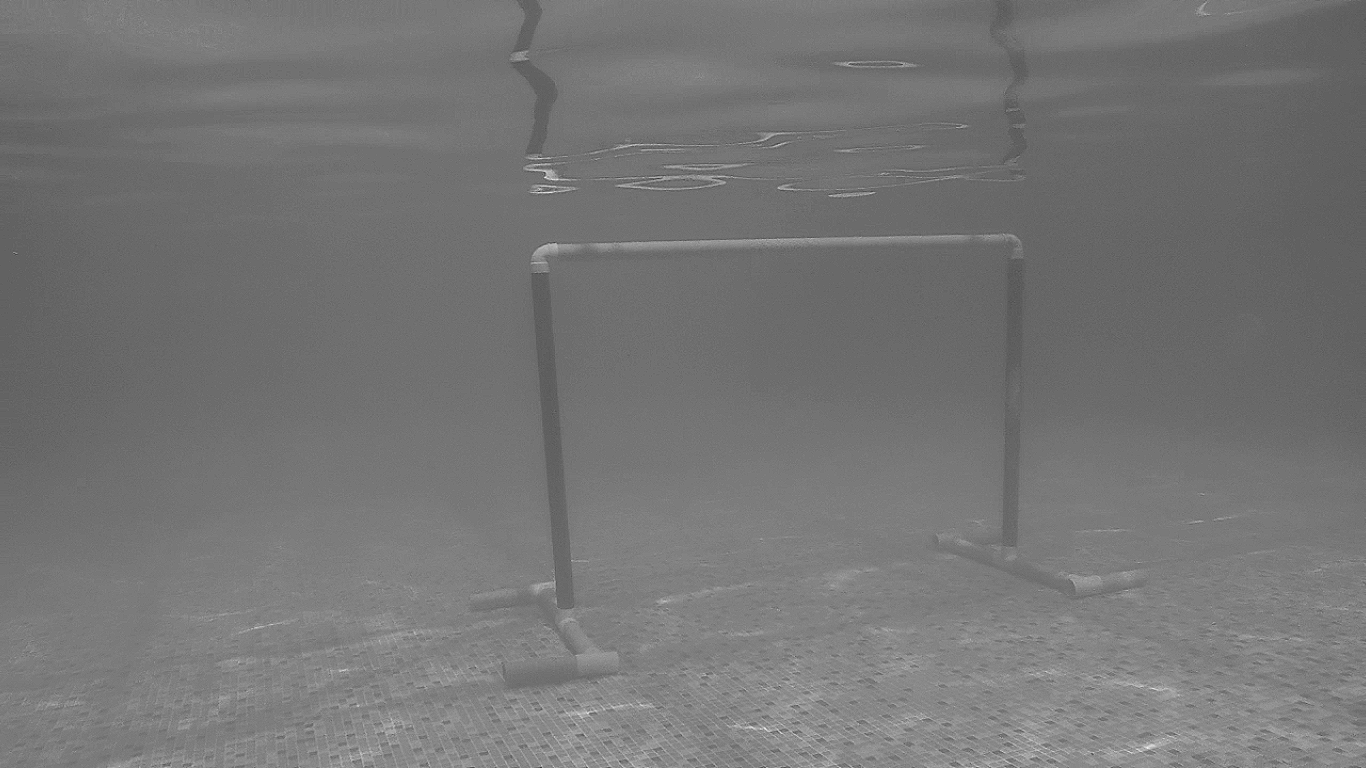

[INFO] applying laplacian kernel


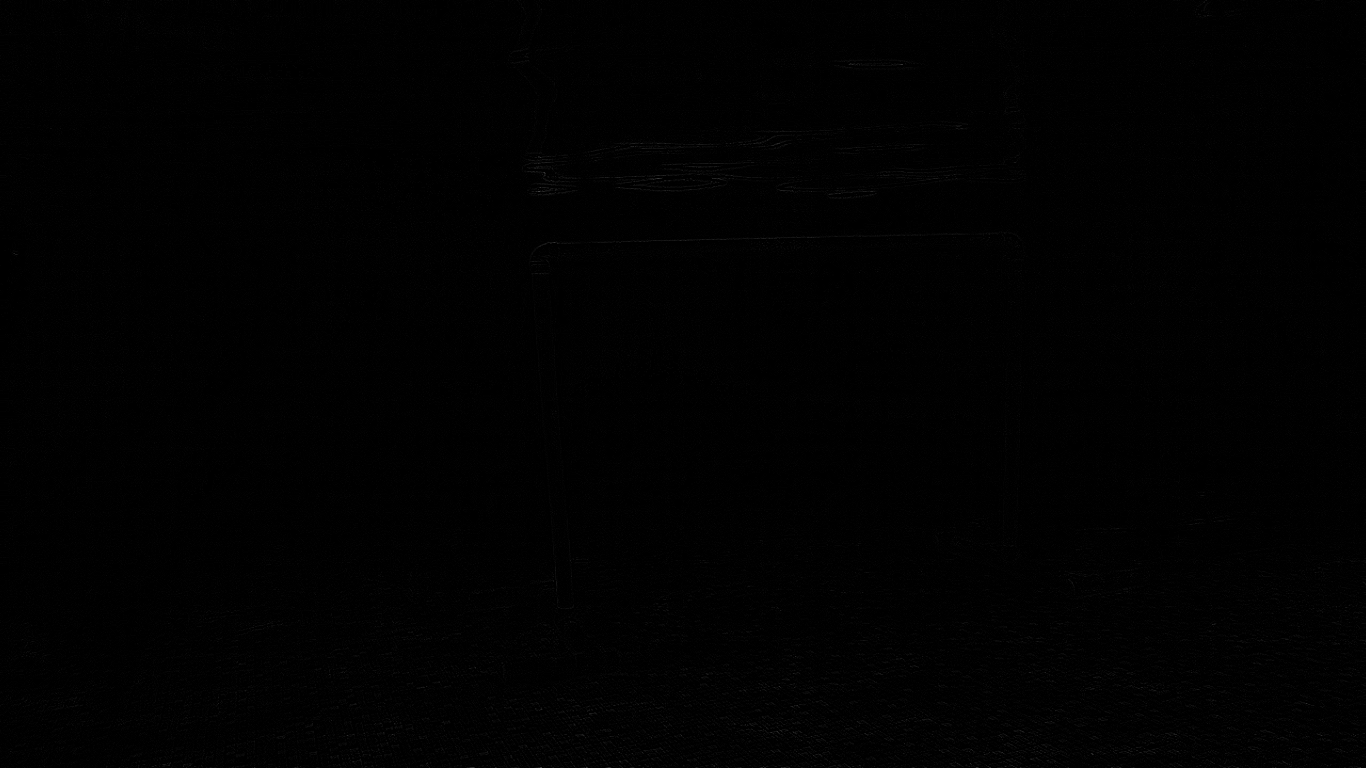

[INFO] applying perwitt kernel


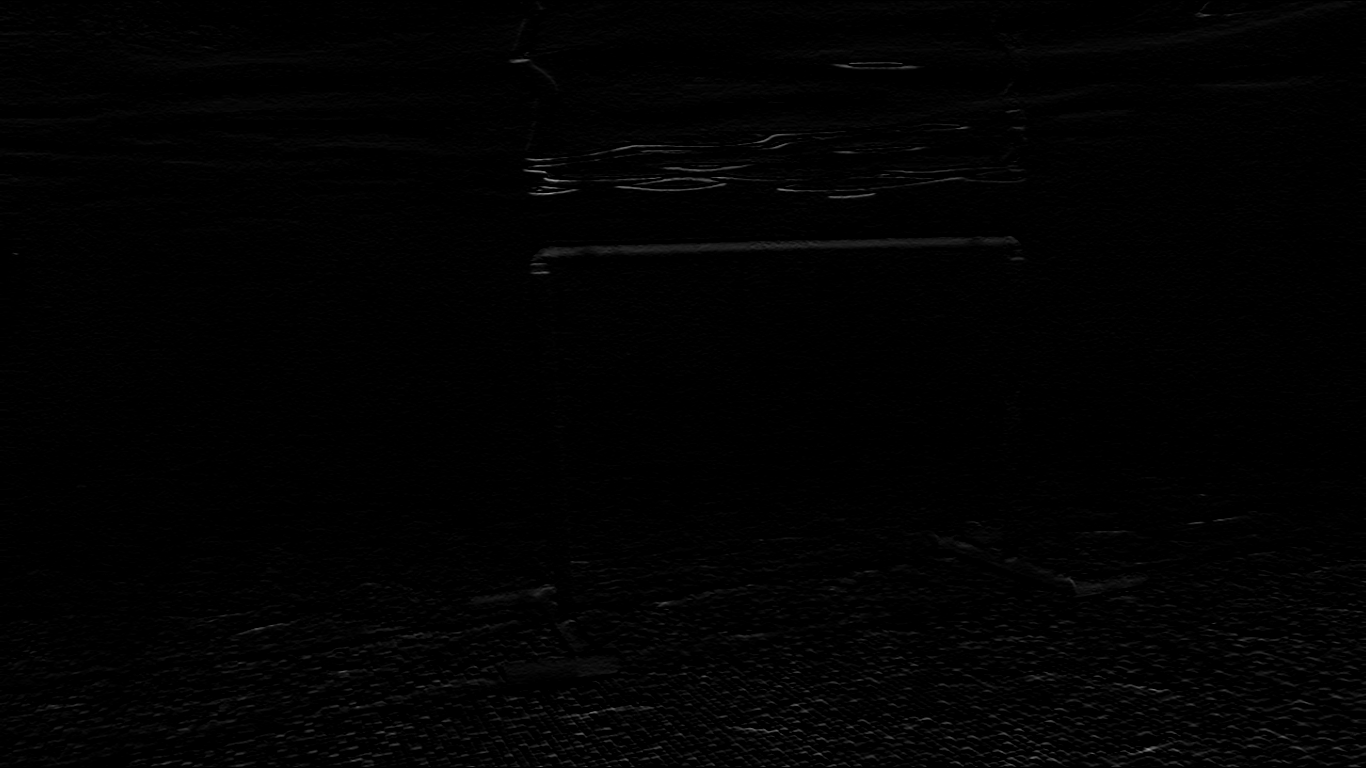

[INFO] applying robert_cross kernel


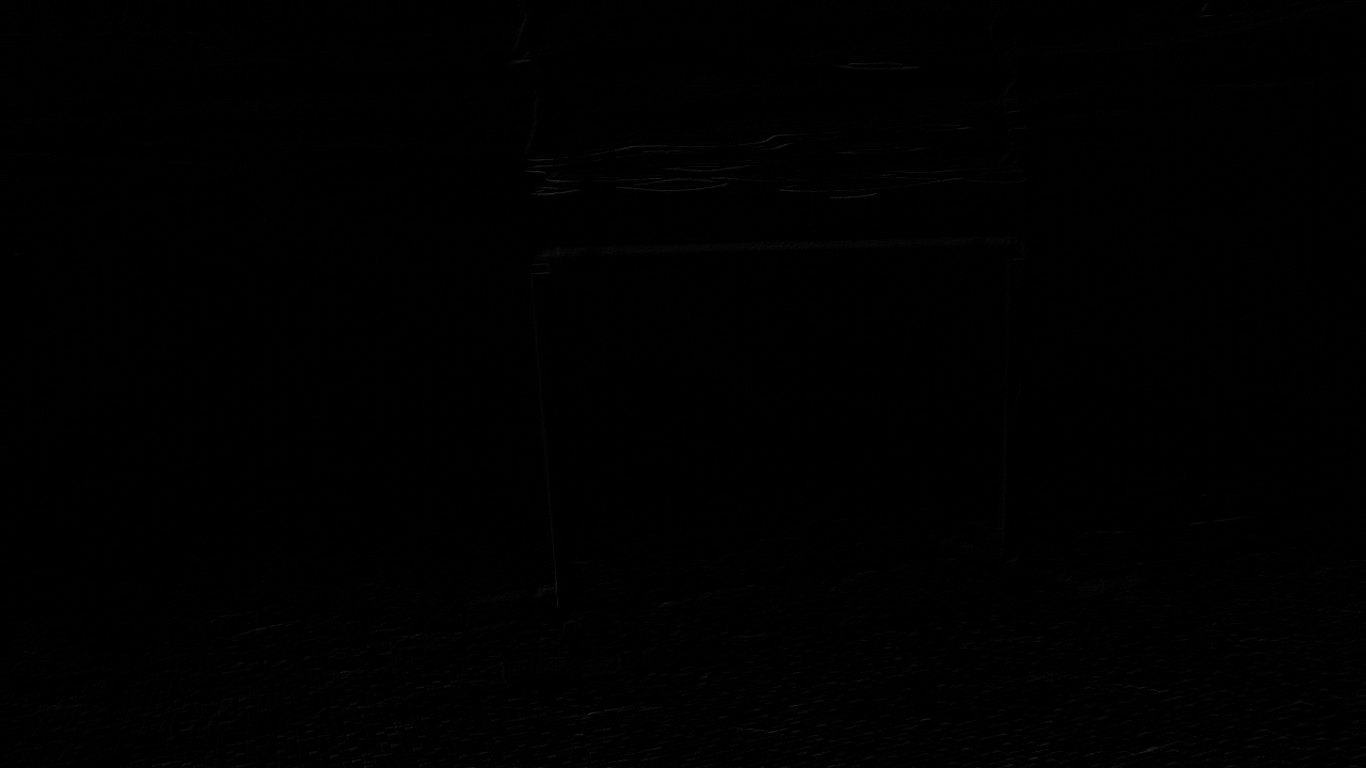

[INFO] applying scharr kernel


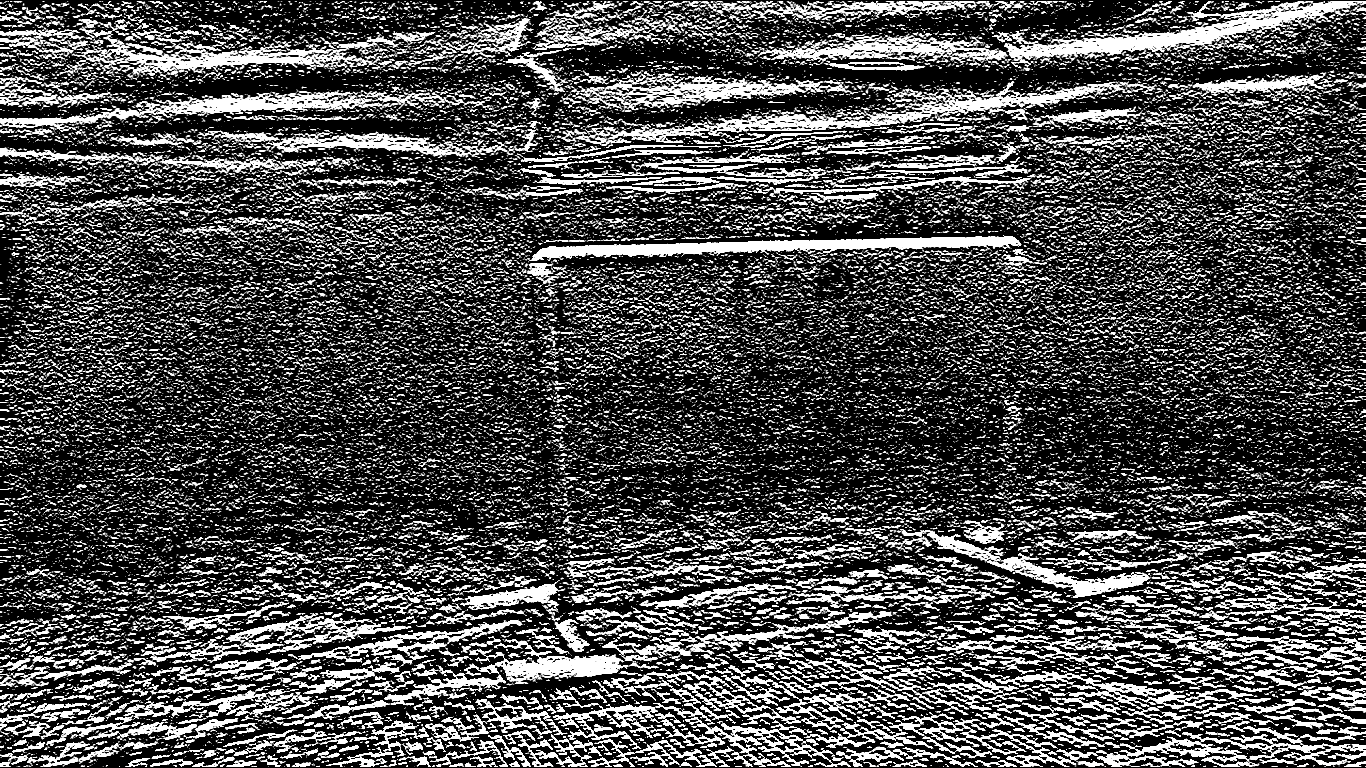

In [39]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
from skimage.exposure import rescale_intensity
from google.colab.patches import cv2_imshow

for (kernelName, kernel) in kernels:
	print("[INFO] applying {} kernel".format(kernelName))
	convoleOutput = convolve(pgray, kernel)
	opencvOutput = cv2.filter2D(pgray, -1, kernel)
	# cv2_imshow(convoleOutput)
	cv2_imshow (opencvOutput)
	# cv2.waitKey(0)
	# cv2.destroyAllWindows()

# LOOKING INTO LAPLACE OPERATOR ALONE

Why emphasis on laplacian ?

Because the divergence of the gradients help captures the ideaology of getting an edge with respect to a gray-scale image ( some smoothing initially would help as well) 

In case you want to learn about laplacian : https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/laplacian/v/laplacian-intuition

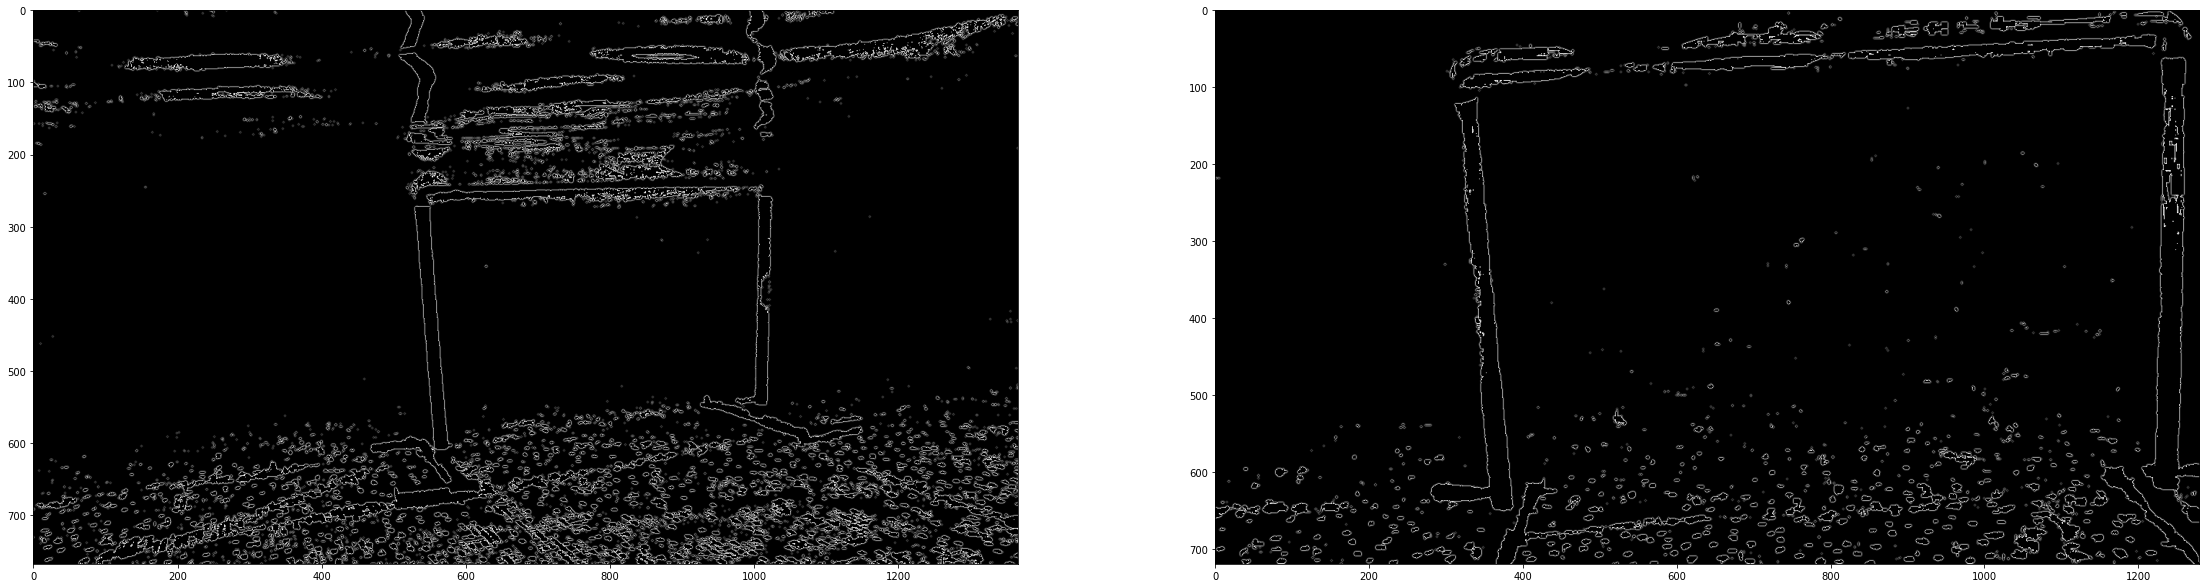

In [49]:
thresh1 = cv2.adaptiveThreshold(pgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,121,4)
thresh2 = cv2.adaptiveThreshold(jgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,121,4)
thresh3 = gaus_img = cv2.GaussianBlur(thresh1,(3,3),0.5)
thresh4 = cv2.GaussianBlur(thresh2,(3,3),0.5)
lap_p = cv2.Laplacian(thresh3,-1)
lap_j = cv2.Laplacian(thresh4,-1)
show_many([lap_p,lap_j])